In [1]:
#Rushikesh Thorat Miniproject on Stock Price Prediction

import os
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Importing the Libraries
%matplotlib inline
import matplotlib. pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
nRowsRead = 1000 
df = pd.read_csv('/kaggle/input/Data/532746.BO.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = '532746.BO.csv'
nRow, nCol = df.shape

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-06-12,130.000000,130.000000,92.419998,94.339996,94.339996,8097280
1,2006-06-13,93.059998,94.940002,77.120003,78.540001,78.540001,7475940
2,2006-06-14,80.000000,88.580002,74.209999,82.029999,82.029999,6582600
3,2006-06-19,88.019997,94.720001,82.269997,92.680000,92.680000,6085285
4,2006-06-20,89.940002,92.400002,86.800003,89.839996,89.839996,3506755


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

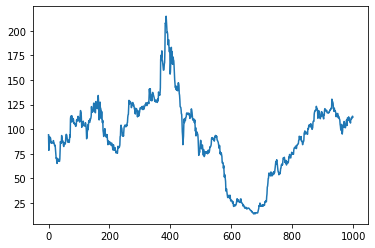

In [5]:
df["Adj Close"].plot()

In [6]:
#Set Target Variable
output_var = pd.DataFrame(df["Adj Close"])
#Selecting the Features
features = ["Open", 'High', "Low", "Volume"]

In [7]:
#normalising dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.589935,0.551098,0.414586,0.644073
1,0.402717,0.383668,0.334313,0.594650
2,0.336526,0.353295,0.319045,0.523593
3,0.377173,0.382617,0.361333,0.484035
4,0.386904,0.371538,0.385100,0.278934


In [8]:
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [9]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

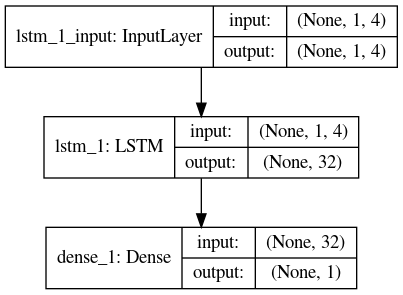

In [10]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

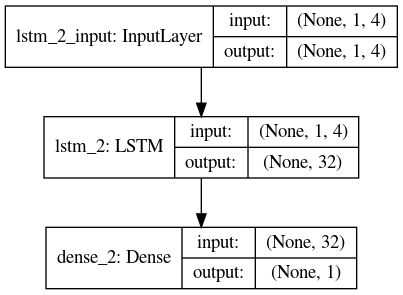

In [11]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [12]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
910/910 [==============================] - 1s 742us/step - loss: 9718.2378
Epoch 2/100
910/910 [==============================] - 0s 248us/step - loss: 9560.6511
Epoch 3/100
910/910 [==============================] - 0s 247us/step - loss: 9150.8741
Epoch 4/100
910/910 [==============================] - 0s 216us/step - loss: 8386.1111
Epoch 5/100
910/910 [==============================] - 0s 207us/step - loss: 7290.7224
Epoch 6/100
910/910 [==============================] - 0s 227us/step - loss: 5994.6967
Epoch 7/100
910/910 [==============================] - 0s 236us/step - loss: 4661.5404
Epoch 8/100
910/910 [==============================] - 0s 240us/step - loss: 3429.1535
Epoch 9/100
910/910 [==============================] - 0s 232us/step - loss: 2386.6384
Epoch 10/100
910/910 [==============================] - 0s 220us/step - loss: 1573.6565
Epoch 11/100
910/910 [==============================] - 0s 211us/step - loss: 988.6807
Epoch 12/100
910/910 [====================

In [13]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

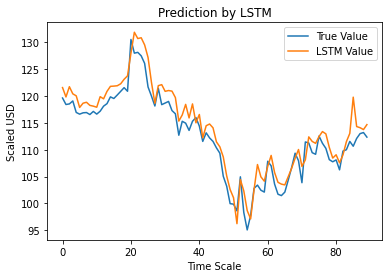

In [14]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label="True Value")
plt.plot(y_pred, label="LSTM Value")
plt.title("Prediction by LSTM")
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

In [15]:
import sklearn
sklearn.metrics.r2_score(y_test, y_pred)

0.8947328179915498